In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/SuperMarket Analysis.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
features = [
    'City',
    'Customer type',
    'Gender',
    'Product line',
    'Quantity',
    'Payment',
    'Date',
    'Time',
    'Rating'
]
target = 'Unit price'
df = df[features + [target]]

df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.drop(['Date', 'Time'], axis=1, inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

C:\Users\lamla\AppData\Local\Temp\ipykernel_9848\2217690454.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,Quantity,Rating,Unit price,DayOfWeek,Hour,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,7,9.1,74.69,5,13,False,True,False,False,False,False,True,False,False,False,True
1,5,9.6,15.28,4,10,True,False,True,False,False,False,False,False,False,False,False
2,7,7.4,46.33,6,13,False,True,True,False,False,False,False,True,False,True,False
3,8,8.4,58.22,6,20,False,True,False,False,False,False,True,False,False,False,True
4,7,5.3,86.31,4,10,False,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6.2,40.35,1,13,True,False,True,True,False,False,True,False,False,False,True
996,10,4.4,97.38,5,17,False,False,True,False,False,False,False,True,False,False,True
997,1,7.7,31.84,5,13,False,True,False,True,False,True,False,False,False,False,False
998,1,4.1,65.82,4,15,False,True,True,True,False,False,False,True,False,False,False


In [5]:
X = df_encoded.drop(target, axis=1)
Y = df_encoded[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=500,
    batch_size=32
)

Epoch 1/500


C:\Users\lamla\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 3103.9446 - mae: 48.8876 - val_loss: 1876.2935 - val_mae: 35.8013
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 964.0673 - mae: 25.5419 - val_loss: 762.7441 - val_mae: 23.6430
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 741.5793 - mae: 23.1028 - val_loss: 783.9473 - val_mae: 23.9516
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 685.2646 - mae: 22.3862 - val_loss: 797.0686 - val_mae: 24.2537
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 675.3942 - mae: 22.2208 - val_loss: 783.3094 - val_mae: 24.0242
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 669.6926 - mae: 22.1450 - val_loss: 787.4886 - val_mae: 24.1651
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 660.7894 - mae: 21.9752 - val_loss: 792.1715 - val_mae: 24.2312
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 650.4977 - mae: 21.7990 - val_loss: 784.6026 - val_mae: 24.1356
Epoch 9/500
25/25 ━━━━━━━

In [29]:
predictions = model.predict(X_test)
print(predictions[:5])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[59.386887]
 [46.66858 ]
 [76.812096]
 [31.128372]
 [40.74543 ]]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test).flatten()

print("MSE:", mean_squared_error(Y_test, y_pred))
print("R2:", r2_score(Y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 1389.7341656406968
R2: -0.8641219486869332


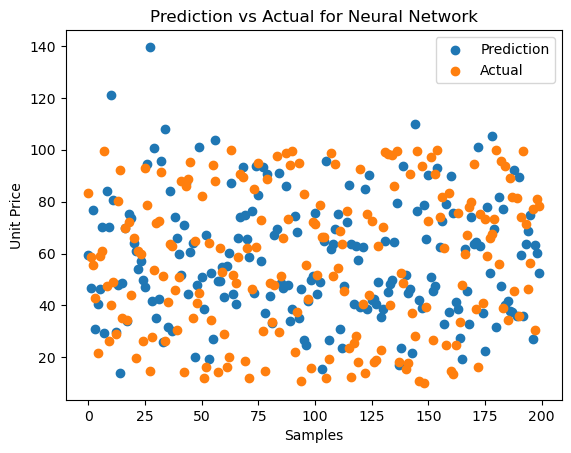

In [37]:
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(range(len(y_pred)), y_pred, label="Prediction")
plt.scatter(range(len(Y_test)), Y_test, label="Actual")
plt.xlabel("Samples")
plt.ylabel("Unit Price")
plt.legend()
plt.title("Prediction vs Actual for Neural Network")
plt.show()


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def build_model_simple(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_model_medium(input_dim):
   model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
   ])
   model.compile(optimizer='adam', loss='mse', metrics=['mae'])
   return model

def build_model_deep(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [49]:
import time
import numpy as np
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping




def train_and_evaluate(model_fn, X_train, Y_train, X_test, Y_test, model_name):
    input_dim = X_train.shape[1]
    model = model_fn(input_dim)
    es = EarlyStopping(patience=10, restore_best_weights=True)

    start = time.time()
    history = model.fit(
        X_train, Y_train,
        validation_split=0.2,
        epochs=300,
        callbacks=[es],
        batch_size=32,
        verbose=0
    )
    end = time.time()

    y_pred = model.predict(X_test).flatten()
    test_mae = mean_absolute_error(Y_test, y_pred)

    results = {
        'Model': model_name,
        'Params': model.count_params(),
        'Train MAE': history.history['mae'][-1],
        'Val MAE': history.history['val_mae'][-1],
        'Test MAE': test_mae,
        'Training Time (s)': round(end - start, 2),
        'History': history
    }

    return results


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_models(X_train, Y_train, X_test, Y_test):
    models = [
        ('Simple NN', build_model_simple),
        ('Medium NN', build_model_medium),
        ('Deep NN', build_model_deep),
    ]

    all_results = []

    for name, fn in models:
        print(f"Training {name}...")
        res = train_and_evaluate(fn, X_train, Y_train, X_test, Y_test, name)
        all_results.append(res)

        # wykres loss
        plt.figure()
        plt.plot(res['History'].history['loss'], label="Train Loss")
        plt.plot(res['History'].history['val_loss'], label="Val Loss")
        plt.title(f"Loss Curve - {name}")
        plt.xlabel("Epoch")
        plt.ylabel("MSE")
        plt.legend()
        plt.show()

    # podsumowanie w tabeli
    df_results = pd.DataFrame([{
        'Model': r['Model'],
        'Params': r['Params'],
        'Train MAE': round(r['Train MAE'], 4),
        'Val MAE': round(r['Val MAE'], 4),
        'Test MAE': round(r['Test MAE'], 4),
        'Training Time (s)': r['Training Time (s)']
    } for r in all_results])

    return df_results


Training Simple NN...


C:\Users\lamla\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


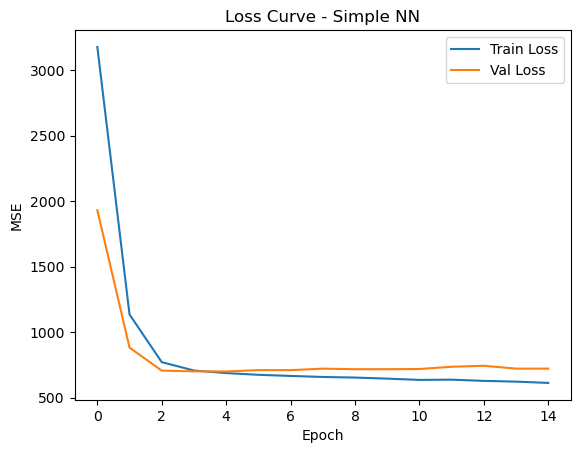

Training Medium NN...


C:\Users\lamla\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


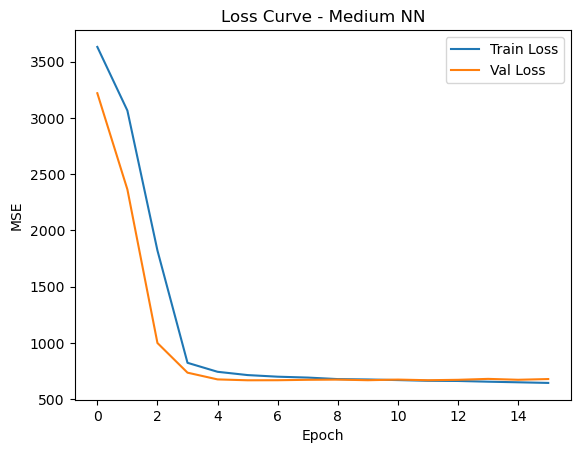

Training Deep NN...


C:\Users\lamla\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


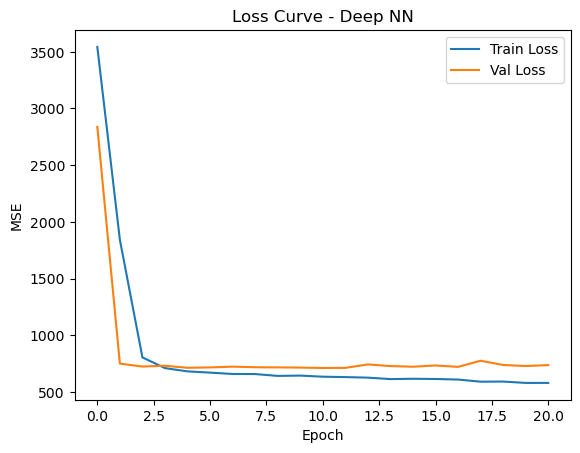

,Model,Params,Train MAE,Val MAE,Test MAE,Training Time (s)
0,Simple NN,68097,21.1917,23.0177,24.1861,2.55
1,Medium NN,7297,21.7962,22.0768,24.2378,2.43
2,Deep NN,28929,20.4418,23.1254,24.5702,3.19


In [51]:
results = compare_models(X_train, Y_train, X_test, Y_test)
results

In [54]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()

    # liczba warstw (np. 1–3)
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=16, max_value=128, step=16),
                activation='relu'
            )
        )

        # dropout 0–0.5
        model.add(
            layers.Dropout(
                hp.Float("dropout_" + str(i), min_value=0.0, max_value=0.5, step=0.1)
            )
        )

    # warstwa wyjściowa
    model.add(layers.Dense(1))

    # learning rate
    lr = hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']
    )

    return model


In [55]:
tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective='val_mae',
    max_trials=20,          # ile modeli przetestować
    directory='tuner_dir',
    project_name='supermarket_price'
)


In [56]:
tuner.search(
    X_train,
    Y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5)
    ]
)

Trial 20 Complete [00h 00m 08s]
val_mae: 22.660537719726562

Best val_mae So Far: 21.983579635620117
Total elapsed time: 00h 02m 08s


In [57]:
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.get_best_models(1)[0]

print(best_hp.values)
#aaa


{'num_layers': 2, 'units_0': 16, 'dropout_0': 0.1, 'learning_rate': 0.001, 'units_1': 48, 'dropout_1': 0.1, 'units_2': 96, 'dropout_2': 0.4}


C:\Users\lamla\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
